### This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders. you may find the csv file in the repostory of the project

### It is a well-understood dataset. All of the variables are continuous and generally in the range of 0 to 1. The output variable is a string “M” for mine and “R” for rock, which will need to be converted to integers 1 and 0.


In [1]:
## Import the library

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:

## For Python, first install the `datapackage` library (all the datasets on DataHub are Data Packages):
##!pip install datapackage

In [3]:
''' ##To get Data Package into your Python environment, run following code:
from datapackage import Package

package = Package('https://datahub.io/machine-learning/sonar/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read()) '''

" ##To get Data Package into your Python environment, run following code:\nfrom datapackage import Package\n\npackage = Package('https://datahub.io/machine-learning/sonar/datapackage.json')\n\n# print list of all resources:\nprint(package.resource_names)\n\n# print processed tabular data (if exists any)\nfor resource in package.resources:\n    if resource.descriptor['datahub']['type'] == 'derived/csv':\n        print(resource.read()) "

In [4]:
df_sonar = pd.read_csv(r"C:/Users/HP/Desktop/dataset/sonar_csv.csv")
df_sonar.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [5]:
## check the basic information of the dataset 
print("basic information of the dataset :- \n ")
df_sonar.info()

basic information of the dataset :- 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    floa

In [6]:
### check the missing value of the dataset column wise or total

print(" NaN value in the data set column wise :- \n " )
print(df_sonar.isnull().sum())
print()
print(" Total NaN value in the data set  :- \n " )
df_sonar.isnull().sum().sum()

 NaN value in the data set column wise :- 
 
attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
               ..
attribute_57    0
attribute_58    0
attribute_59    0
attribute_60    0
Class           0
Length: 61, dtype: int64

 Total NaN value in the data set  :- 
 


0

In [7]:
#Lets use the describe function 

df_sonar.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
#Lets chcek the datatypes of each column in datset

df_sonar.dtypes

attribute_1     float64
attribute_2     float64
attribute_3     float64
attribute_4     float64
attribute_5     float64
                 ...   
attribute_57    float64
attribute_58    float64
attribute_59    float64
attribute_60    float64
Class            object
Length: 61, dtype: object

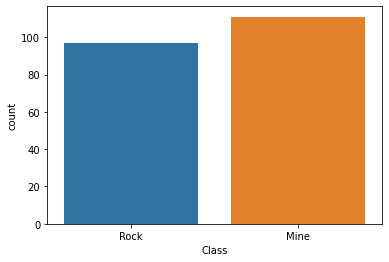

In [9]:
##lets chcek the count of each class in target vraiables

sns.countplot(x="Class",data=df_sonar)
plt.show()
#Below we can see it is balanced dataset 

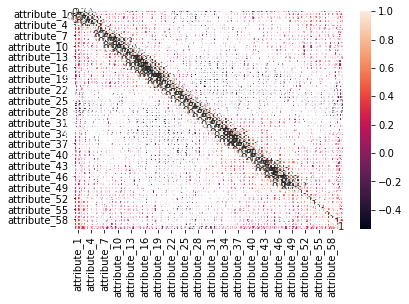

In [10]:
# lets check the correlation by heatmap

sns.heatmap(df_sonar.corr() ,annot= True)

plt.show()

##Analysis : It looks like there is also some structure in the order of the attributes. 
#The yellow around the diagonal suggests that attributes that are next to each other are generally more correlated with 
#each other. The dark blue patches also suggest some moderate negative correlation the further attributes are away from 
#each other in the ordering. This makes sense if the order of the attributes refers to the angle of sensors for the sonar 
#chirp.

In [11]:
# Plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_sonar.corr(), vmin=-1, vmax=1, interpolation=None,figs)
fig.colorbar(cax)
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-11-751aea322cc5>, line 4)

In [12]:
#Lets chcek the target variable value counts
df_sonar["Class"].value_counts()

Mine    111
Rock     97
Name: Class, dtype: int64

## Data Visualization

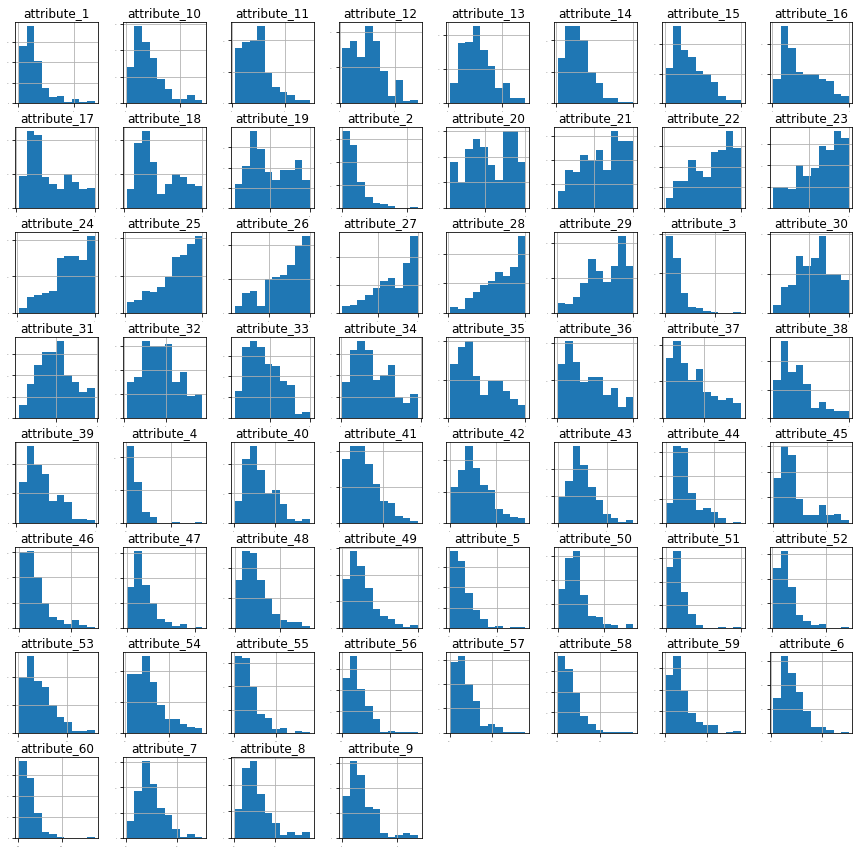

In [13]:
# Unimodal Hist Visualization
df_sonar.hist(sharex=False,sharey=False,figsize=(15,15), xlabelsize=1, ylabelsize=1)
plt.show()

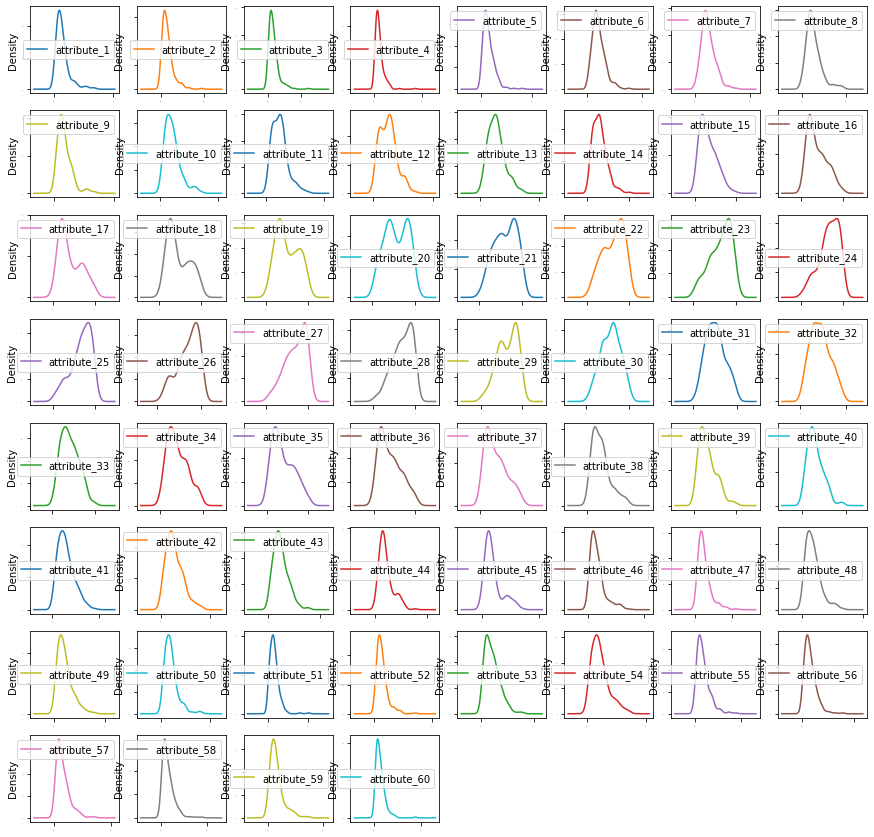

In [14]:
# Unimodal Density Visualization
df_sonar.plot(kind='density', subplots=True, sharex=False, sharey=False, layout=(8,8) ,fontsize=1 ,figsize=(15,15))
plt.show()

## Analysis : It is observed that many of the features have skewed distribution

In [15]:
#Lets seprate the input and output variable

x=df_sonar.drop(columns=["Class"])## independent variable 
y=df_sonar[["Class"]] ## predicted variable

###############################################################################

# Split the input features and output feature
#X = data.iloc[:,0:60].values.astype(float)
#Y = data.iloc[:,60]

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
Y

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:

X=np.array(x)
print(x)
print(x.dtypes)

     attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0         0.0200       0.0371       0.0428       0.0207       0.0954   
1         0.0453       0.0523       0.0843       0.0689       0.1183   
2         0.0262       0.0582       0.1099       0.1083       0.0974   
3         0.0100       0.0171       0.0623       0.0205       0.0205   
4         0.0762       0.0666       0.0481       0.0394       0.0590   
..           ...          ...          ...          ...          ...   
203       0.0187       0.0346       0.0168       0.0177       0.0393   
204       0.0323       0.0101       0.0298       0.0564       0.0760   
205       0.0522       0.0437       0.0180       0.0292       0.0351   
206       0.0303       0.0353       0.0490       0.0608       0.0167   
207       0.0260       0.0363       0.0136       0.0272       0.0214   

     attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
0         0.0986       0.1539       0.1601       0.3109  

In [18]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,X,Y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(X, Y,random_state = r_state,test_size=0.20,stratify=Y)
        clf.fit(x_train,y_train)
        Y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,Y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [19]:
#Lets initialise the data frame with columns model and f1_score

df_models=pd.DataFrame(columns=["model","f1_score","std"])
models=list()
f1_scr=list()
std=list()

In [20]:
#lets use logistic regression for the classification problem


from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

log_reg=LogisticRegression()
maxf1_score(log_reg,X,Y)

maximum f1_score is at random state : 82  and it is : 0.9


In [21]:
#Lets compute the mean f1 score and and standard deviation using cross val_score

import numpy as np
from sklearn.model_selection import StratifiedKFold

f1_score_logistic=np.array([])
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X,Y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    
    y_train, y_test = Y[train_index], Y[test_index]
    
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    tmp=f1_score(y_test,y_pred)
    
    f1_score_logistic=np.append(f1_score_logistic,[tmp])
    
print("mean f1 score for logsistic after stratified cross validation : ",np.mean(f1_score_logistic))
print("standard deviation for logistic from mean f1 score is : ",np.std(f1_score_logistic))
print("array of f1 scores : ",f1_score_logistic)

models.append("logistic")
f1_scr.append(np.mean(f1_score_logistic))
std.append(np.std(f1_score_logistic))

mean f1 score for logsistic after stratified cross validation :  0.6304769249130151
standard deviation for logistic from mean f1 score is :  0.1401885194439788
array of f1 scores :  [0.53061224 0.73684211 0.57894737 0.84444444 0.46153846]


In [22]:
#Lets use decision tree classifier


from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
maxf1_score(dc,X,Y)

maximum f1_score is at random state : 95  and it is : 0.9047619047619048


In [23]:
#Lets compute the mean f1 score and and standard deviation using cross val_score
import numpy as np
from sklearn.model_selection import StratifiedKFold

f1_score_dc=np.array([])
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X, Y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    dc.fit(x_train,y_train)
    y_pred=dc.predict(x_test)
    tmp=f1_score(y_test,y_pred)
    f1_score_dc=np.append(f1_score_dc,[tmp])
    
print("mean f1 score for decision after stratified cross validation : ",np.mean(f1_score_dc))
print("standard deviation for decision from mean f1 score is : ",np.std(f1_score_dc))
print("array of f1 scores : ",f1_score_dc)
models.append("decision treee")
f1_scr.append(np.mean(f1_score_dc))
std.append(np.std(f1_score_dc))

mean f1 score for decision after stratified cross validation :  0.6241092241092241
standard deviation for decision from mean f1 score is :  0.10115592064961068
array of f1 scores :  [0.54545455 0.56410256 0.61904762 0.82051282 0.57142857]


In [24]:

#Lets use KNN
#For KNN we need to know the best value of k using grid search

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(X,Y)
clf.best_params_

{'n_neighbors': 3}

In [25]:
#KNN classifier with n_neighbors=3

kc=KNeighborsClassifier(n_neighbors=3)
maxf1_score(kc,X,Y)

maximum f1_score is at random state : 66  and it is : 0.9230769230769231


In [26]:
#Lets compute the mean f1 score and and standard deviation using cross val_score

import numpy as np
from sklearn.model_selection import StratifiedKFold

f1_score_kc=np.array([])
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X,Y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    kc.fit(x_train,y_train)
    y_pred=kc.predict(x_test)
    tmp=f1_score(y_test,y_pred)
    f1_score_kc=np.append(f1_score_kc,[tmp])
    
    
print("mean f1 score for KNN after stratified cross validation : ",np.mean(f1_score_kc))
print("standard deviation for KNN from mean f1 score is : ",np.std(f1_score_kc))
print("array of f1 scores : ",f1_score_kc)
models.append("KNN")
f1_scr.append(np.mean(f1_score_kc))
std.append(np.std(f1_score_kc))

mean f1 score for KNN after stratified cross validation :  0.5258439348513086
standard deviation for KNN from mean f1 score is :  0.12509704791983817
array of f1 scores :  [0.55       0.65       0.55813953 0.58536585 0.28571429]


In [27]:
#Lets use SVM classifier

from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(X,Y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [28]:
svc=SVC(kernel="linear",C=10)
maxf1_score(svc,X,Y)


maximum f1_score is at random state : 91  and it is : 0.8717948717948718


In [29]:
#Lets compute the mean f1 score and and standard deviation using cross val_score

import numpy as np
from sklearn.model_selection import StratifiedKFold
f1_score_svc=np.array([])
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X,Y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    tmp=f1_score(y_test,y_pred)
    f1_score_svc=np.append(f1_score_svc,[tmp])
    
print("mean f1 score for SVM after stratified cross validation : ",np.mean(f1_score_svc))
print("standard deviation for SVM from mean f1 score is : ",np.std(f1_score_svc))
print("array of f1 scores : ",f1_score_svc)
models.append("SVM")
f1_scr.append(np.mean(f1_score_svc))
std.append(np.std(f1_score_svc))

mean f1 score for SVM after stratified cross validation :  0.6563860607066182
standard deviation for SVM from mean f1 score is :  0.10422855251168374
array of f1 scores :  [0.53061224 0.60606061 0.66666667 0.84444444 0.63414634]


In [30]:

df_models["model"]=models
df_models["f1_score"]=f1_scr
df_models["std"]=std
df_models

,model,f1_score,std
0,logistic,0.630477,0.140189
1,decision treee,0.624109,0.101156
2,KNN,0.525844,0.125097
3,SVM,0.656386,0.104229


In [31]:
#From above table w.r.t F1_score SVM is performing the best 
#So we will choose that model
#max score is achived at random state 91

x_train,x_test,y_train,y_test=train_test_split(X, Y,random_state = 91,test_size=0.20,stratify=Y)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [32]:
#Model performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20  2]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.89      0.85      0.87        20

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



In [33]:
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier


# Split the input feature for training and testing
seed =7

In [34]:
# Create model test harness

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate data on test harness
results = []
names = []
num_folds = 10
scoring = 'accuracy' 

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.781618 (0.098034)
LDA: 0.722426 (0.117788)
KNN: 0.770956 (0.092089)
CART: 0.747059 (0.117920)
NB: 0.638235 (0.080214)
SVM: 0.776471 (0.121488)
